Source(s):

https://bjs.ojp.gov/data-collection/national-prisoner-statistics-nps-program#publications-0

https://csat.bjs.ojp.gov/quick-tables

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

<h1> National and State Data </h1>

<h2>Data Verification & Handling</h2>

In [54]:
plt.rcParams["font.size"] = "18"

fed_Offenses = pd.read_csv('CSAT/Federal Offenses SR.csv', low_memory=False)
state_Offenses = pd.read_csv('CSAT/State Offenses.csv', low_memory=False)
both_Yearly_Custody = pd.read_csv('CSAT/In Custody Both.csv', low_memory=False)
both_Imprisonment_Rates = pd.read_csv('CSAT/Sentenced Imprisonment Rates.csv', low_memory=False)
both_Admissions = pd.read_csv('CSAT/Total Admissions Both.csv', low_memory=False)
both_Releases = pd.read_csv('CSAT/Total Releases Both.csv', low_memory=False)
both_Under_Jurisdiction = pd.read_csv('CSAT/Under Jurisdiction Both.csv', low_memory=False)

for col in state_Offenses:
    state_Offenses[col] = state_Offenses[col].fillna('0').replace('-',"0").replace('Other violent','Other Violent')

for col in fed_Offenses:
    fed_Offenses[col] = fed_Offenses[col].fillna('0').replace('-',"0")

fed_Offenses = fed_Offenses.set_index('Year').sort_index(ascending=True)
state_Offenses = state_Offenses.set_index('Year').sort_index(ascending=True)

<h2>Federal Offenses & Prison Populations</h2>

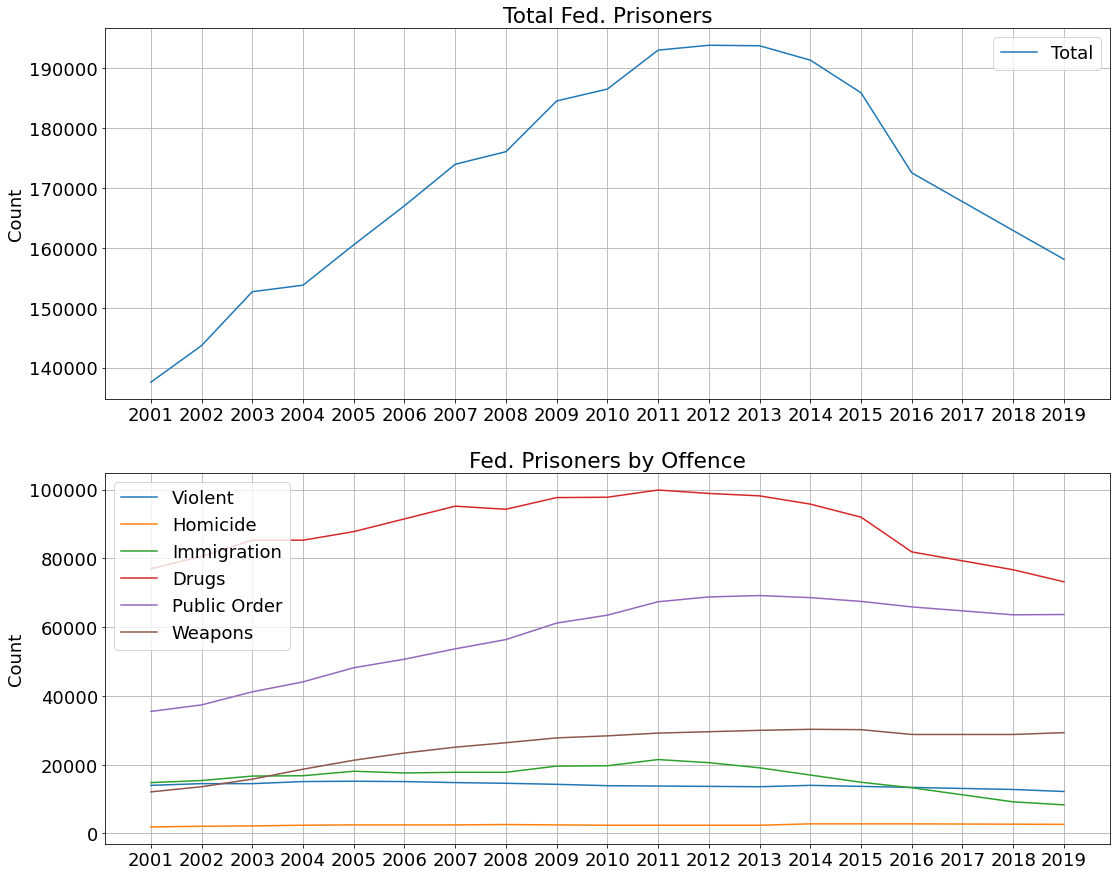

In [55]:
offenses = fed_Offenses.groupby("Most serious offense")
tot_Offenses = offenses.get_group("Total")
tot_Violent = offenses.get_group("Total Violent")
tot_Homicide = offenses.get_group("Homicide")
tot_Immigration = offenses.get_group("Immigration")
tot_Drug = offenses.get_group("Total Drug")
tot_Order = offenses.get_group("Total Public Order")
tot_Weps = offenses.get_group("Weapons")

fig = plt.figure(figsize = (18,15))
grid = plt.GridSpec(2,1, hspace = 0.2, wspace = 0.2, figure = fig)
linbin = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018, 2019]

fig.add_subplot(grid[0,0], title = "Total Fed. Prisoners", ylabel="Count")
plt.xticks(range(2001, 2020, 1))
plt.plot(linbin, pd.to_numeric(tot_Offenses['All prisoners']), label = 'Total')
plt.grid()
plt.legend()

fig.add_subplot(grid[1,0], title = "Fed. Prisoners by Offence", ylabel="Count")
plt.xticks(range(2001, 2020, 1))
plt.plot(linbin, pd.to_numeric(tot_Violent['All prisoners']), label = 'Violent')
plt.plot(linbin, pd.to_numeric(tot_Homicide['All prisoners']), label = 'Homicide')
plt.plot(linbin, pd.to_numeric(tot_Immigration['All prisoners']), label = 'Immigration')
plt.plot(linbin, pd.to_numeric(tot_Drug['All prisoners']), label = 'Drugs')
plt.plot(linbin, pd.to_numeric(tot_Order['All prisoners']), label = 'Public Order')
plt.plot(linbin, pd.to_numeric(tot_Weps['All prisoners']), label = 'Weapons')
plt.grid()
plt.legend()

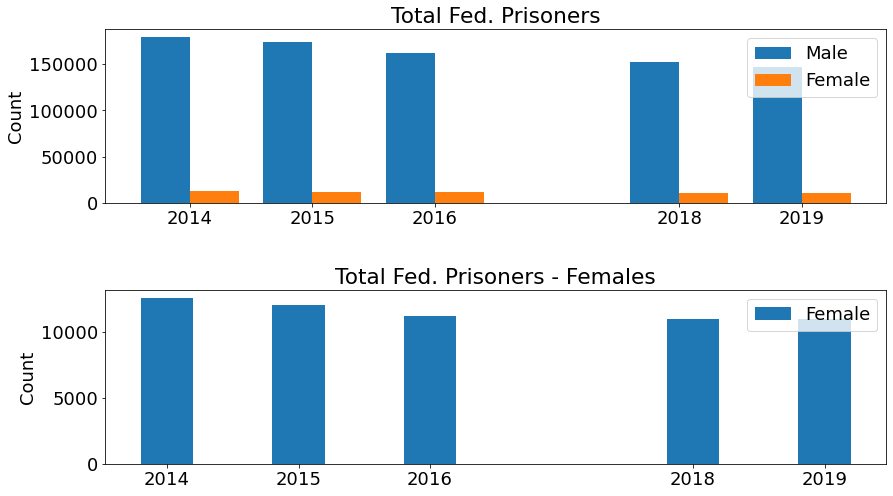

In [56]:
lowInfoYears = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

tot_Offenses_Male = tot_Offenses['Male'].drop(lowInfoYears)
tot_Offenses_Female = tot_Offenses['Female'].drop(lowInfoYears)

linbin2 = [2013.8, 2014.8, 2015.8, 2017.8, 2018.8]
linbin3 = [2014.2, 2015.2, 2016.2, 2018.2, 2019.2]
linbin4 = [2014, 2015, 2016, 2018, 2019]

fig = plt.figure(figsize = (14,8))
grid = plt.GridSpec(2,1, hspace = 0.5, wspace = 0.2, figure = fig)

fig.add_subplot(grid[0,0], title = "Total Fed. Prisoners", ylabel="Count")
plt.xticks([2014, 2015, 2016, 2018, 2019])
plt.bar(linbin2, pd.to_numeric(tot_Offenses_Male), width=0.4, label="Male")
plt.bar(linbin3, pd.to_numeric(tot_Offenses_Female), width=0.4,label="Female")
plt.legend()

fig.add_subplot(grid[1,0], title = "Total Fed. Prisoners - Females", ylabel="Count")
plt.xticks([2014, 2015, 2016, 2018, 2019])
plt.bar(linbin4, pd.to_numeric(tot_Offenses_Female), width=0.4,label="Female")
plt.legend()

<BarContainer object of 4 artists>

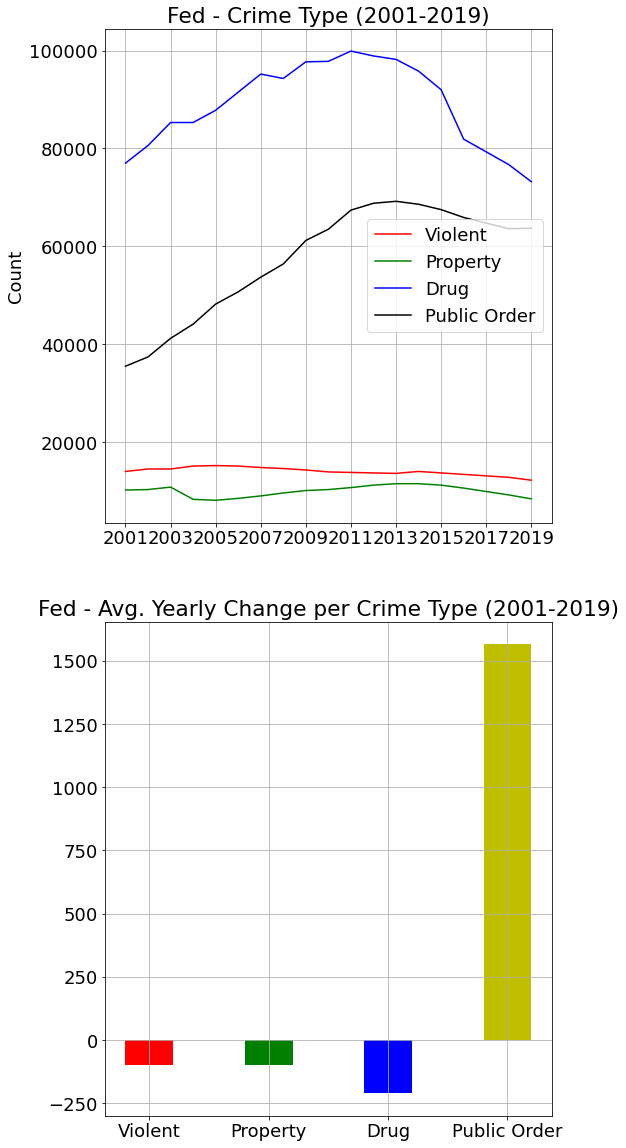

In [57]:
# Total Violent, Total Property, Total Drug, Total Public Order
f_Violent = pd.to_numeric(offenses["All prisoners"].get_group("Total Violent"))
f_Property = pd.to_numeric(offenses["All prisoners"].get_group("Total Property"))
f_Drug = pd.to_numeric(offenses["All prisoners"].get_group("Total Drug"))
f_PubOrder = pd.to_numeric(offenses["All prisoners"].get_group("Total Public Order"))

fig = plt.figure(figsize = (8,20))
grid = plt.GridSpec(2,1, hspace = 0.2, wspace = 0.2, figure = fig)


tots_Slopes = {
    'Violent': ((pd.to_numeric(f_Violent[2001]) - pd.to_numeric(f_Violent[2019])) / -18), 
    'Property': ((pd.to_numeric(f_Property[2001]) - pd.to_numeric(f_Property[2019])) / -18), 
    'Drug': ((pd.to_numeric(f_Drug[2001]) - pd.to_numeric(f_Drug[2019])) / -18),
    'Public Order': ((pd.to_numeric(f_PubOrder[2001]) - pd.to_numeric(f_PubOrder[2019])) / -18)
    }
tot_Slope_Series = pd.Series(data=tots_Slopes, index=['Violent', 'Property', 'Drug', 'Public Order'])

fig.add_subplot(grid[0,0], title = "Fed - Crime Type (2001-2019)", ylabel="Count")
plt.xticks([2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019])
plt.grid()
plt.plot(linbin, f_Violent, color = 'r', label = "Violent")
plt.plot(linbin, f_Property, color = 'g', label = "Property")
plt.plot(linbin, f_Drug, color = 'b', label = "Drug")
plt.plot(linbin, f_PubOrder, color = 'black', label = "Public Order")
plt.legend()

fig.add_subplot(grid[1,0], title = "Fed - Avg. Yearly Change per Crime Type (2001-2019)")
plt.grid()
plt.bar(tot_Slope_Series.keys(), tot_Slope_Series, width=0.4, color=['r','g','b', "y"])

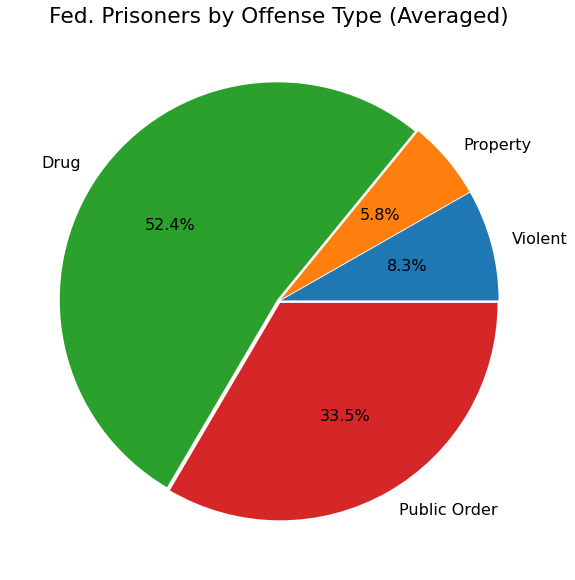

In [58]:
# Totals by Offense Type
fig = plt.figure(figsize = (18,10))
grid = plt.GridSpec(1,1, hspace = 0.2, wspace = 0.2, figure = fig)

f_Violent = pd.to_numeric(offenses["All prisoners"].get_group("Total Violent"))
f_Property = pd.to_numeric(offenses["All prisoners"].get_group("Total Property"))
f_Drug = pd.to_numeric(offenses["All prisoners"].get_group("Total Drug"))
f_PubOrder = pd.to_numeric(offenses["All prisoners"].get_group("Total Public Order"))

f_tot_Vals = [f_Violent.mean(), f_Property.mean(), f_Drug.mean(), f_PubOrder.mean()]
f_tot_Labels = ["Violent", "Property", "Drug", "Public Order"]

fig.add_subplot(grid[0,0], title = "Fed. Prisoners by Offense Type (Averaged)")
plt.pie(f_tot_Vals, labels = f_tot_Labels, autopct='%1.1f%%', textprops={'fontsize': 16}, explode = (0.01, 0.01, 0.01, 0.01));

C:\Users\jtayl\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


<BarContainer object of 3 artists>

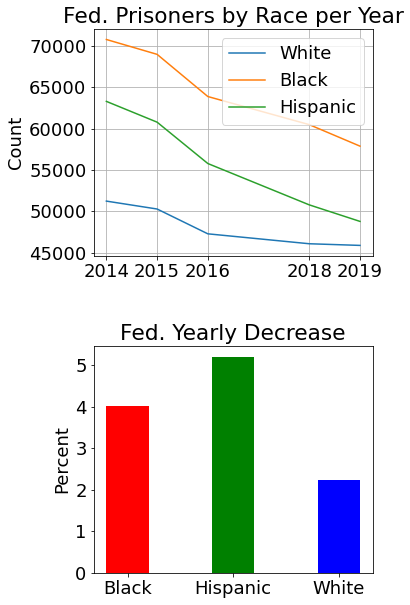

In [59]:
tot_Offenses_White = tot_Offenses['White'].drop(lowInfoYears)
tot_Offenses_Black = tot_Offenses['Black'].drop(lowInfoYears)
tot_Offenses_Hispanic = tot_Offenses['Hispanic'].drop(lowInfoYears)

slopes = {'Black': [(((pd.to_numeric(tot_Offenses_Black[2014]) - pd.to_numeric(tot_Offenses_Black[2019]))/6) / (pd.to_numeric(tot_Offenses_Black).sum()/6))*100],
     'Hispanic': [(((pd.to_numeric(tot_Offenses_Hispanic[2014]) - pd.to_numeric(tot_Offenses_Hispanic[2019]))/6) / (pd.to_numeric(tot_Offenses_Hispanic).sum()/6))*100],
     'White': [(((pd.to_numeric(tot_Offenses_White[2014]) - pd.to_numeric(tot_Offenses_White[2019]))/6) / (pd.to_numeric(tot_Offenses_White).sum()/6))*100]}


slope_Series = pd.Series(data=slopes, index=['Black', 'Hispanic', 'White'])

fig = plt.figure(figsize = (5,10))
grid = plt.GridSpec(2,1, hspace = 0.4, wspace = 0.2, figure = fig)

fig.add_subplot(grid[0,0], title = "Fed. Prisoners by Race per Year", ylabel="Count")
plt.xticks([2014, 2015, 2016, 2018, 2019])
plt.plot(linbin4, pd.to_numeric(tot_Offenses_White), label = 'White')
plt.plot(linbin4, pd.to_numeric(tot_Offenses_Black), label = 'Black')
plt.plot(linbin4, pd.to_numeric(tot_Offenses_Hispanic), label = 'Hispanic')
plt.grid()
plt.legend()

fig.add_subplot(grid[1,0], title = "Fed. Yearly Decrease", ylabel="Percent")
plt.bar(slope_Series.keys(), slope_Series, width=0.4, color=['r','g','b'])

<BarContainer object of 3 artists>

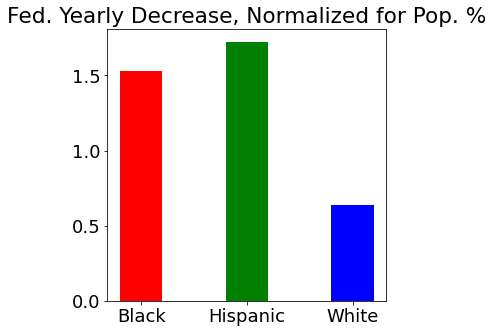

In [60]:
fig = plt.figure(figsize = (5,5))
grid = plt.GridSpec(1,1, hspace = 0.4, wspace = 0.2, figure = fig)

total = pd.to_numeric(tot_Offenses_White).sum() + pd.to_numeric(tot_Offenses_Black).sum() + pd.to_numeric(tot_Offenses_Hispanic).sum()

slope2 = {'Black': [slopes['Black'][0] * (pd.to_numeric(tot_Offenses_Black).sum() / total)], 
     'Hispanic': [slopes['Hispanic'][0] * (pd.to_numeric(tot_Offenses_Hispanic).sum() / total)],
     'White': [slopes['White'][0] * (pd.to_numeric(tot_Offenses_White).sum() / total)]}

slope_Series2 = pd.Series(data=slope2, index=['Black', 'Hispanic', 'White'])
fig.add_subplot(grid[0,0], title = "Fed. Yearly Decrease, Normalized for Pop. %")
plt.bar(slope_Series2.keys(), slope_Series2, width=0.4, color=['r','g','b'])

<h2>State Offenses & Prison Populations</h2>

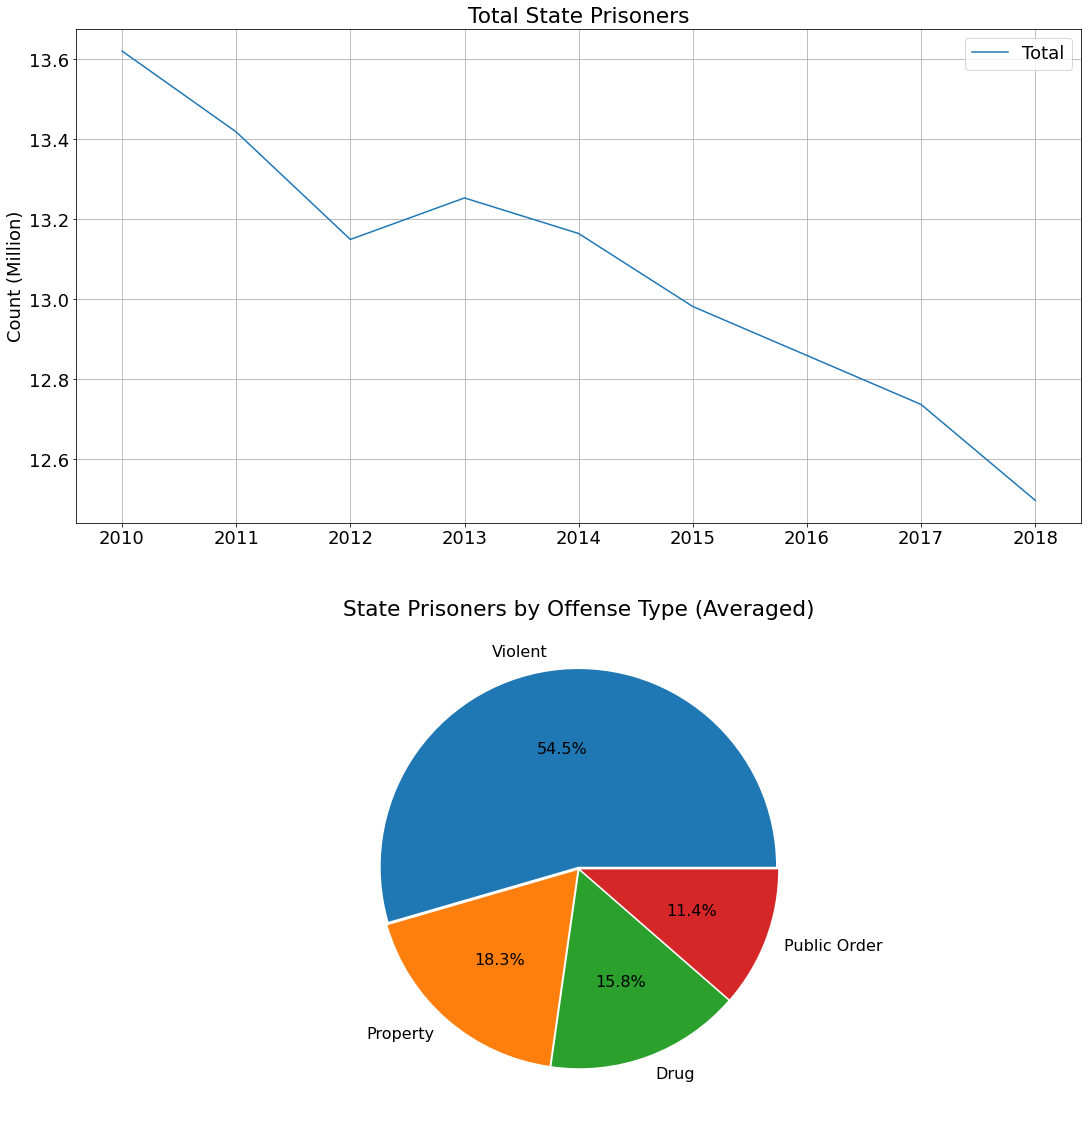

In [61]:
s_offenses = state_Offenses.groupby("Most serious offense")
s_tot_Offenses = s_offenses.get_group("Total")

fig = plt.figure(figsize = (18,20))
grid = plt.GridSpec(2,1, hspace = 0.2, wspace = 0.2, figure = fig)
linbin_state = [2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018]

# Total
fig.add_subplot(grid[0,0], title = "Total State Prisoners", ylabel="Count (Million)")
plt.plot(linbin_state, (pd.to_numeric(s_tot_Offenses['All Prisoners']) / 100000), label = 'Total')
plt.grid()
plt.legend()


# Totals by Offense Type

s_Violent = pd.to_numeric(s_offenses["All Prisoners"].get_group("Total Violent"))
s_Property = pd.to_numeric(s_offenses["All Prisoners"].get_group("Total Property"))
s_Drug = pd.to_numeric(s_offenses["All Prisoners"].get_group("Total Drug"))
s_PubOrder = pd.to_numeric(s_offenses["All Prisoners"].get_group("Total Public Order"))

s_tot_Vals = [s_Violent.mean(), s_Property.mean(), s_Drug.mean(), s_PubOrder.mean()]
s_tot_Labels = ["Violent", "Property", "Drug", "Public Order"]

fig.add_subplot(grid[1,0], title = "State Prisoners by Offense Type (Averaged)")
plt.pie(s_tot_Vals, labels = s_tot_Labels, autopct='%1.1f%%', textprops={'fontsize': 16}, explode = (0.01, 0.01, 0.01, 0.01));

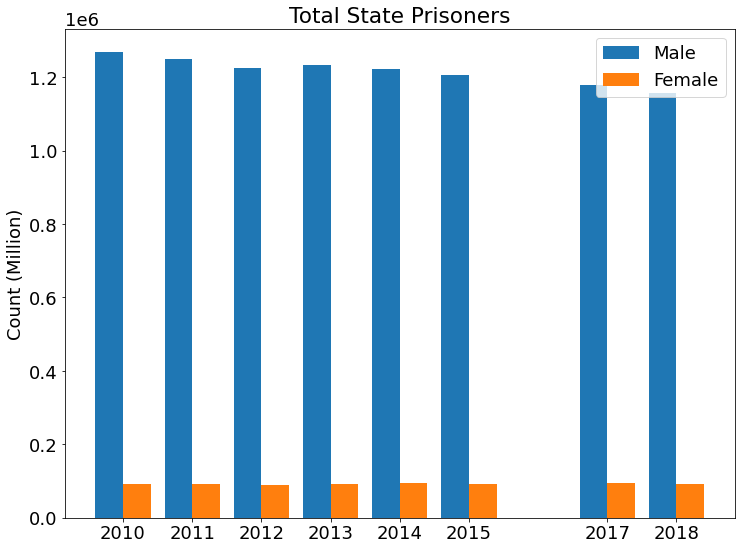

In [62]:
s_Offenses_Male = s_tot_Offenses['Male']
s_Offenses_Female = s_tot_Offenses['Female']

linbin6 = [2009.8, 2010.8, 2011.8, 2012.8, 2013.8, 2014.8, 2016.8, 2017.8]
linbin7 = [2010.2, 2011.2, 2012.2, 2013.2, 2014.2, 2015.2, 2017.2, 2018.2]

fig = plt.figure(figsize = (12,9))
grid = plt.GridSpec(1,1, hspace = 0.5, wspace = 0.2, figure = fig)

fig.add_subplot(grid[0,0], title = "Total State Prisoners", ylabel="Count (Million)")
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018])
plt.bar(linbin6, pd.to_numeric(s_Offenses_Male), width=0.4, label="Male")
plt.bar(linbin7, pd.to_numeric(s_Offenses_Female), width=0.4,label="Female")
plt.legend()

<BarContainer object of 4 artists>

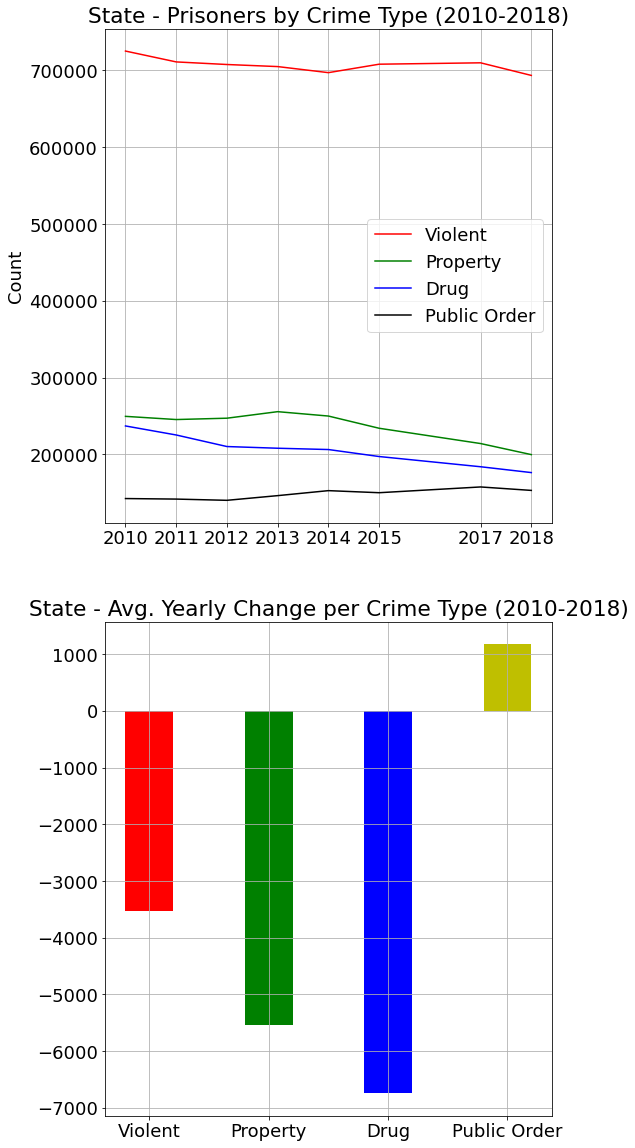

In [63]:
# Total Violent, Total Property, Total Drug, Total Public Order
s_Violent = pd.to_numeric(s_offenses["All Prisoners"].get_group("Total Violent"))
s_Property = pd.to_numeric(s_offenses["All Prisoners"].get_group("Total Property"))
s_Drug = pd.to_numeric(s_offenses["All Prisoners"].get_group("Total Drug"))
s_PubOrder = pd.to_numeric(s_offenses["All Prisoners"].get_group("Total Public Order"))

fig = plt.figure(figsize = (8,20))
grid = plt.GridSpec(2,1, hspace = 0.2, wspace = 0.2, figure = fig)


s_tots_Slopes = {
    'Violent': ((pd.to_numeric(s_Violent[2010]) - pd.to_numeric(s_Violent[2018])) / -9), 
    'Property': ((pd.to_numeric(s_Property[2010]) - pd.to_numeric(s_Property[2018])) / -9), 
    'Drug': ((pd.to_numeric(s_Drug[2010]) - pd.to_numeric(s_Drug[2018])) / -9),
    'Public Order': ((pd.to_numeric(s_PubOrder[2010]) - pd.to_numeric(s_PubOrder[2018])) / -9)
    }
s_tot_Slope_Series = pd.Series(data=s_tots_Slopes, index=['Violent', 'Property', 'Drug', 'Public Order'])

fig.add_subplot(grid[0,0], title = "State - Prisoners by Crime Type (2010-2018)", ylabel="Count")
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018])
plt.grid()
plt.plot(linbin_state, s_Violent, color = 'r', label = "Violent")
plt.plot(linbin_state, s_Property, color = 'g', label = "Property")
plt.plot(linbin_state, s_Drug, color = 'b', label = "Drug")
plt.plot(linbin_state, s_PubOrder, color = 'black', label = "Public Order")
plt.legend()

fig.add_subplot(grid[1,0], title = "State - Avg. Yearly Change per Crime Type (2010-2018)")
plt.grid()
plt.bar(s_tot_Slope_Series.keys(), s_tot_Slope_Series, width=0.4, color=['r','g','b', "y"])

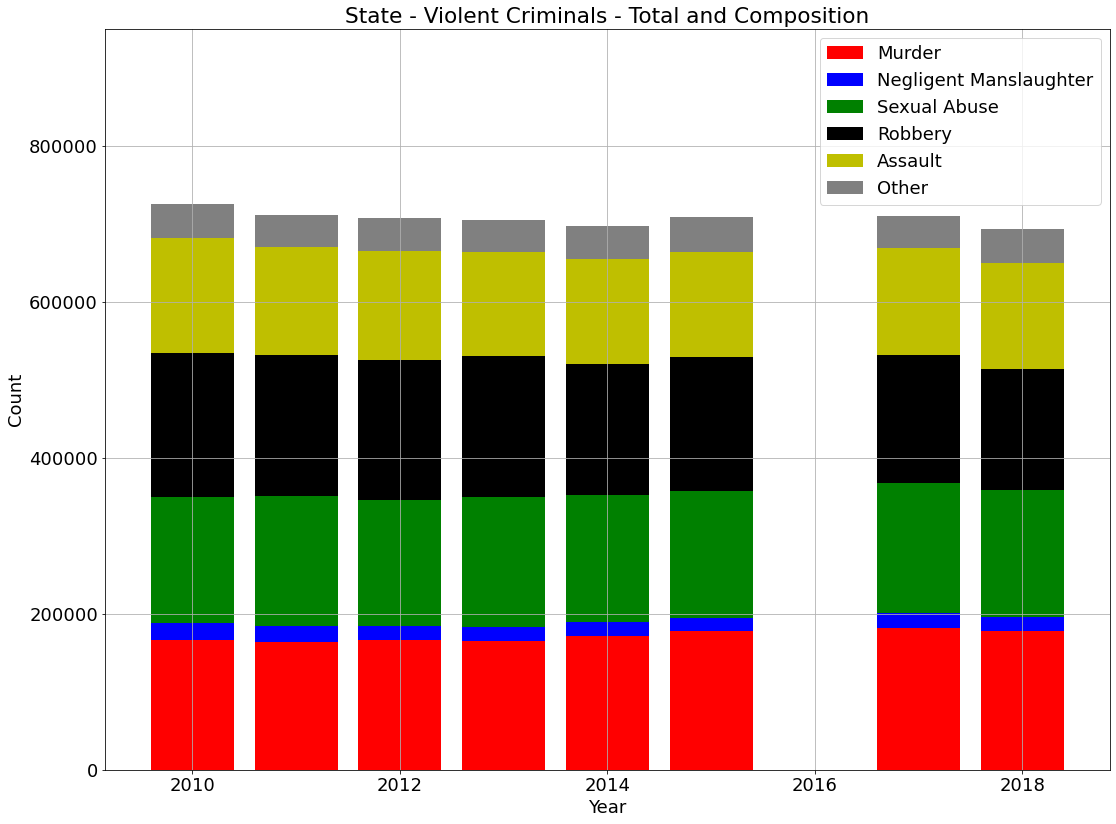

In [64]:
fig = plt.figure(figsize = (18,30))
grid = plt.GridSpec(2,1, hspace = 0.2, wspace = 0.2, figure = fig)

s_Murder = pd.to_numeric(s_offenses["All Prisoners"].get_group("Murder"))
s_Mansl = pd.to_numeric(s_offenses["All Prisoners"].get_group("Negligent manslaughter"))
s_Sex_Abuse = pd.to_numeric(s_offenses["All Prisoners"].get_group("Sexual Abuse"))
s_Robbery = pd.to_numeric(s_offenses["All Prisoners"].get_group("Robbery"))
s_Assault = pd.to_numeric(s_offenses["All Prisoners"].get_group("Aggravated/Simple Assault"))
s_Other_Violent = pd.to_numeric(s_offenses["All Prisoners"].get_group("Other Violent"))

fig.add_subplot(grid[0,0])
plt.bar(linbin_state, s_Murder, color = 'r')
plt.bar(linbin_state, s_Mansl, bottom = s_Murder, color='b')
plt.bar(linbin_state, s_Sex_Abuse, bottom = s_Murder + s_Mansl, color='g')
plt.bar(linbin_state, s_Robbery, bottom = s_Murder + s_Mansl + s_Sex_Abuse, color='black')
plt.bar(linbin_state, s_Assault, bottom = s_Murder + s_Mansl + s_Sex_Abuse + s_Robbery, color='y')
plt.bar(linbin_state, s_Other_Violent, bottom = s_Murder + s_Mansl + s_Sex_Abuse + s_Robbery + s_Assault, color='gray')
plt.ylim(0,950000)
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(["Murder", "Negligent Manslaughter", "Sexual Abuse", "Robbery", "Assault", "Other"])
plt.title("State - Violent Criminals - Total and Composition")
plt.grid()
plt.show()

C:\Users\jtayl\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


<BarContainer object of 3 artists>

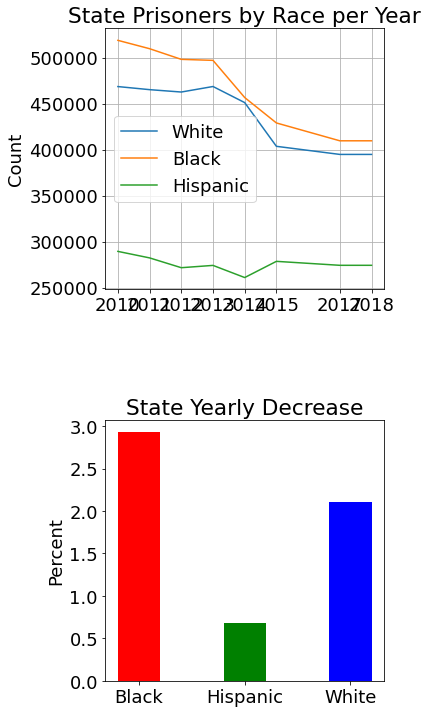

In [70]:
state_Offenses_White = s_tot_Offenses['White']
state_Offenses_Black = s_tot_Offenses['Black']
state_Offenses_Hispanic = s_tot_Offenses['Hispanic']

s_slopes = {'Black': [(((pd.to_numeric(state_Offenses_Black[2010]) - pd.to_numeric(state_Offenses_Black[2018]))/9) / (pd.to_numeric(state_Offenses_Black).sum()/9))*100],
     'Hispanic': [(((pd.to_numeric(state_Offenses_Hispanic[2010]) - pd.to_numeric(state_Offenses_Hispanic[2018]))/9) / (pd.to_numeric(state_Offenses_Hispanic).sum()/9))*100],
     'White': [(((pd.to_numeric(state_Offenses_White[2010]) - pd.to_numeric(state_Offenses_White[2018]))/9) / (pd.to_numeric(state_Offenses_White).sum()/9))*100]}


s_slope_Series = pd.Series(data=s_slopes, index=['Black', 'Hispanic', 'White'])
s_race_linbin = [2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018]

fig = plt.figure(figsize = (5,12))
grid = plt.GridSpec(2,1, hspace = 0.5, wspace = 0.2, figure = fig)

fig.add_subplot(grid[0,0], title = "State Prisoners by Race per Year", ylabel="Count")
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018])
plt.plot(s_race_linbin, pd.to_numeric(state_Offenses_White), label = 'White')
plt.plot(s_race_linbin, pd.to_numeric(state_Offenses_Black), label = 'Black')
plt.plot(s_race_linbin, pd.to_numeric(state_Offenses_Hispanic), label = 'Hispanic')
plt.grid()
plt.legend()

fig.add_subplot(grid[1,0], title = "State Yearly Decrease", ylabel="Percent")
plt.bar(s_slope_Series.keys(), s_slope_Series, width=0.4, color=['r','g','b'])

<BarContainer object of 3 artists>

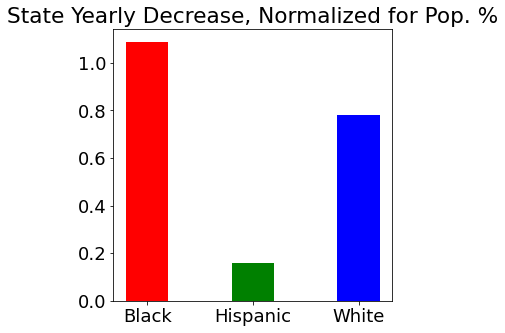

In [69]:
fig = plt.figure(figsize = (5,5))
grid = plt.GridSpec(1,1, hspace = 0.4, wspace = 0.2, figure = fig)

total = pd.to_numeric(state_Offenses_White).sum() + pd.to_numeric(state_Offenses_Black).sum() + pd.to_numeric(state_Offenses_Hispanic).sum()

slope2 = {'Black': [s_slopes['Black'][0] * (pd.to_numeric(state_Offenses_White).sum() / total)], 
     'Hispanic': [s_slopes['Hispanic'][0] * (pd.to_numeric(state_Offenses_Hispanic).sum() / total)],
     'White': [s_slopes['White'][0] * (pd.to_numeric(state_Offenses_White).sum() / total)]}

slope_Series2 = pd.Series(data=slope2, index=['Black', 'Hispanic', 'White'])
fig.add_subplot(grid[0,0], title = "State Yearly Decrease, Normalized for Pop. %")
plt.bar(slope_Series2.keys(), slope_Series2, width=0.4, color=['r','g','b'])